In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [25]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# Get information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
# Summary statistics for numerical columns
print(data.describe())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [28]:
# Check for missing values
(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

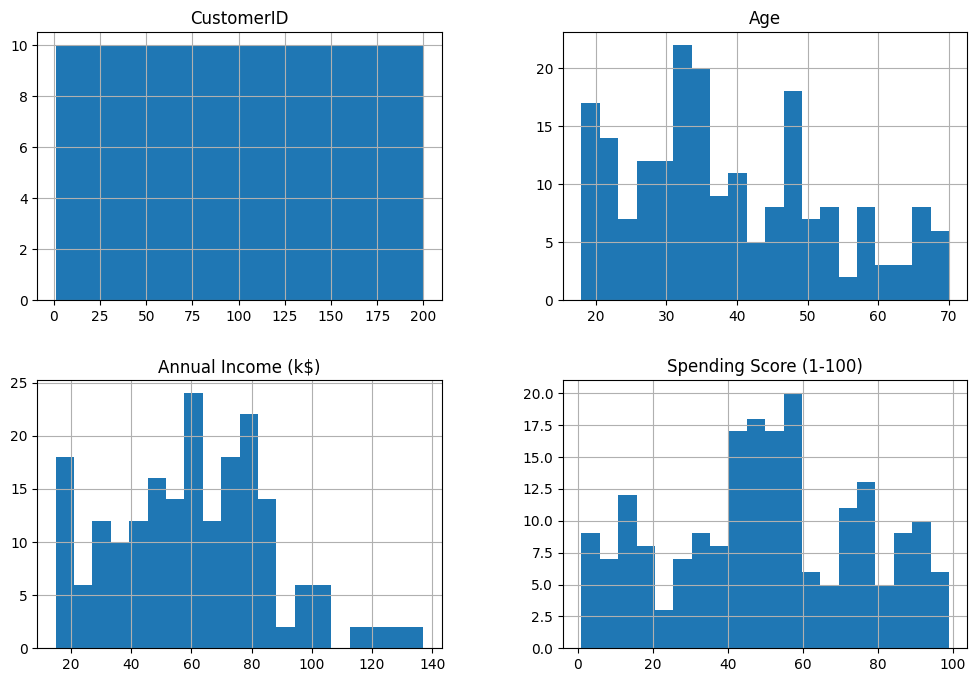

In [29]:
# Plot histograms for numerical columns
data.hist(bins=20, figsize=(12, 8))
plt.show()

In [30]:
#Data Pre-Processing
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data.head()
#male-1 , female-0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [31]:
#Scaling & Normalization
scaler = MinMaxScaler()
data[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.008197,0.051020
3,4,0,23,0.008197,0.775510
4,5,0,31,0.016393,0.397959


In [32]:
#Clustering with Annual Income and Spending Score as Factors

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


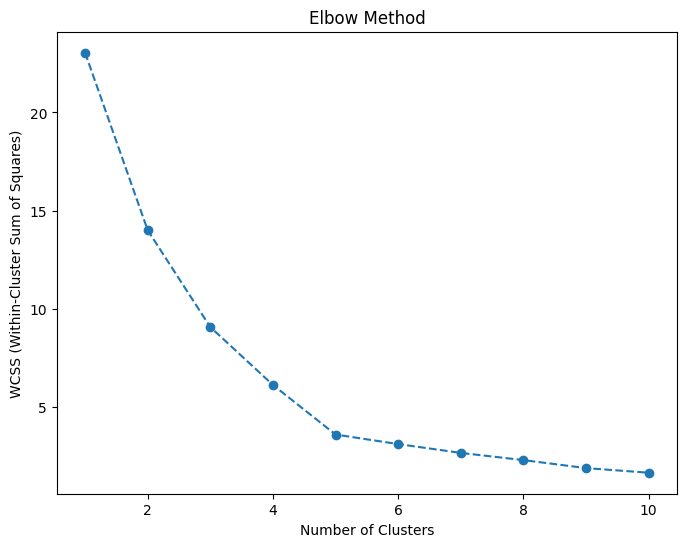

In [33]:
# Plot the Elbow method graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [34]:
#The curve looks like an elbow around 5, so optimal_clusters=5
optimal_clusters=5

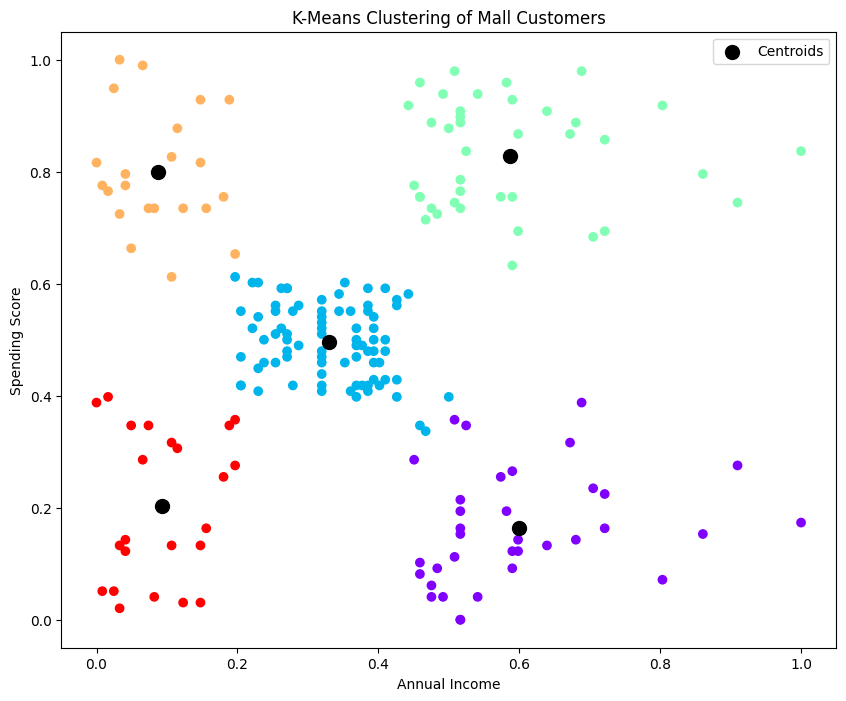

In [35]:
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.show()